With this project I wanted to explore the application of Python and machine learning tools for geospatial analysis.
I was inspired by a **Kaggle** competition aim at predicting taxis' trips duration in the City of New York.

### Data fields
-  **id** - a unique identifier for each trip
-  **vendor_id** - a code indicating the provider associated with the trip record
-  **pickup_datetime** - date and time when the meter was engaged
-  **dropoff_datetime** - date and time when the meter was disengaged
-  **passenger_count** - the number of passengers in the vehicle (driver entered value)
-  **pickup_longitude** - the longitude where the meter was engaged
-  **pickup_latitude** - the latitude where the meter was engaged
-  **dropoff_longitude** - the longitude where the meter was disengaged
-  **dropoff_latitude** - the latitude where the meter was disengaged
-  **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
-  **trip_duration** - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

In [15]:
import pandas as pd
import numpy as np
import time

In [16]:
train = pd.read_csv("./train.csv", sep = ',')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [18]:
train = train.drop(['vendor_id', 'id', 'store_and_fwd_flag'], axis = 1)

In [19]:
train.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455
1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663
2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124
3,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429
4,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435


In [20]:
train.shape

(1458644, 8)

In [21]:
train.isnull().any()

pickup_datetime      False
dropoff_datetime     False
passenger_count      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
trip_duration        False
dtype: bool

In [22]:
train.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [23]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [36]:
start = time.time()

train['pickup_hour'] = train['pickup_datetime'].\
apply(lambda x: x.hour)

train['pickup_month'] = train['pickup_datetime'].\
apply(lambda x: x.month)

train['pickup_dayofweek'] = train['pickup_datetime'].\
apply(lambda x: x.weekday())

train['pickup_dayofweek_name'] = train['pickup_datetime'].\
apply(lambda x: x.day_name())

end = time.time()

print("This cell took {} seconds".format(round(end-start,2)))

This cell took 33.52 seconds


In [25]:
train.dtypes

pickup_datetime          datetime64[ns]
dropoff_datetime         datetime64[ns]
passenger_count                   int64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
trip_duration                     int64
pickup_hour                       int64
pickup_month                      int64
pickup_dayofweek                  int64
pickup_dayofweek_name            object
dtype: object

In [26]:
train[train['pickup_month'] > 6].count()

pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
trip_duration            0
pickup_hour              0
pickup_month             0
pickup_dayofweek         0
pickup_dayofweek_name    0
dtype: int64

We don't have travels from the month of July to December.

## Some data viz

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig
%matplotlib inline

In [28]:
sns.set_style('ticks')

#matplotlib.style.use('fast')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.figsize'] = (8, 7)

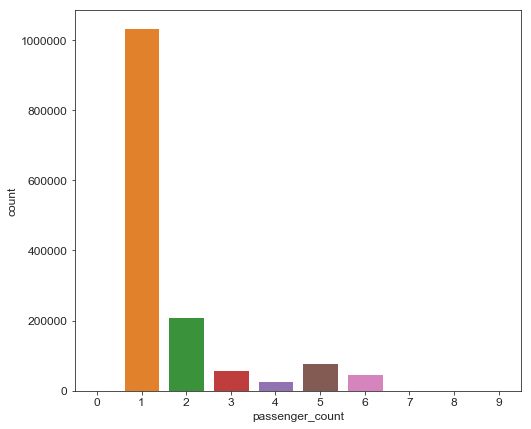

In [29]:
passenger_count = sns.countplot(train['passenger_count'])
plt.savefig("passenger_count.png")

In [30]:
percentage_onepass = (train[train['passenger_count'] == 1].count()[0])/\
(train[train['passenger_count'] >= 1].count()[0])*100

In [31]:
print('the travel with one passenger are the {} % of the total travels'.format(round(percentage_onepass,2)))

the travel with one passenger are the 70.86 % of the total travels


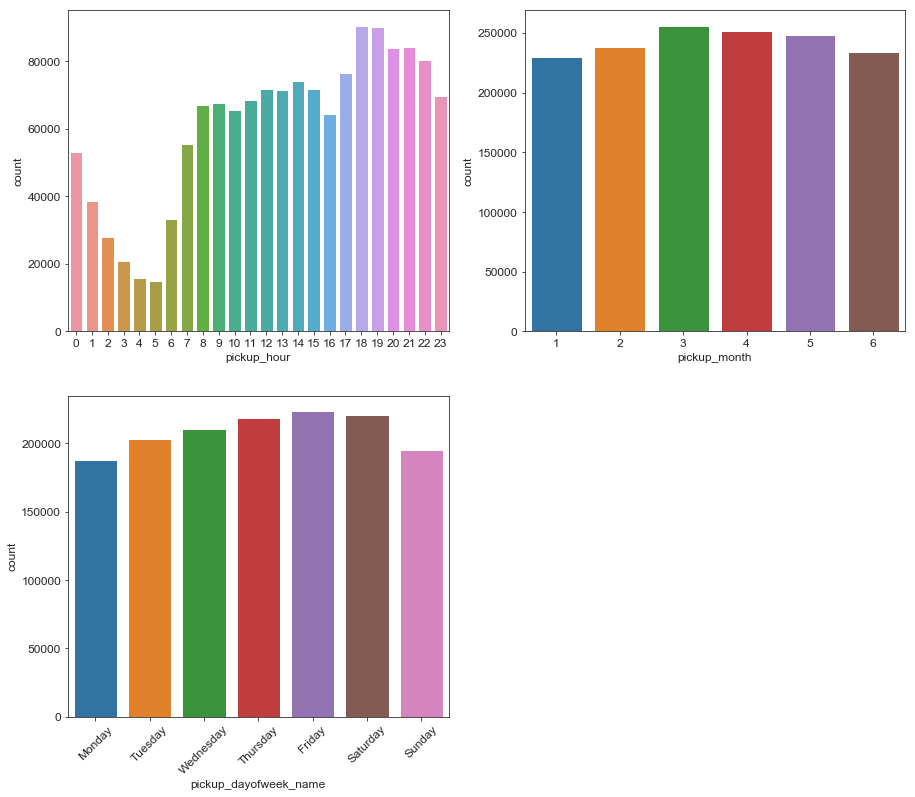

In [32]:
plt.figure(figsize=(15, 13))

plt.subplot(221)
sns.countplot(train['pickup_hour'])

plt.subplot(222)
sns.countplot(train['pickup_month'])

plt.subplot(223)
sns.countplot(train['pickup_dayofweek_name'],
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.xticks(rotation=45)

plt.savefig("subplots.png")
plt.show()

In [34]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]

pickup_mask = (train.pickup_longitude> xlim[0])\
& (train.pickup_longitude < xlim[1])\
& (train.pickup_latitude> ylim[0])\
& (train.pickup_latitude < ylim[1])

dropoff_mask = (train.dropoff_longitude> xlim[0])\
& (train.dropoff_longitude < xlim[1])\
& (train.dropoff_latitude> ylim[0])\
& (train.dropoff_latitude < ylim[1])

train = train[pickup_mask & dropoff_mask]


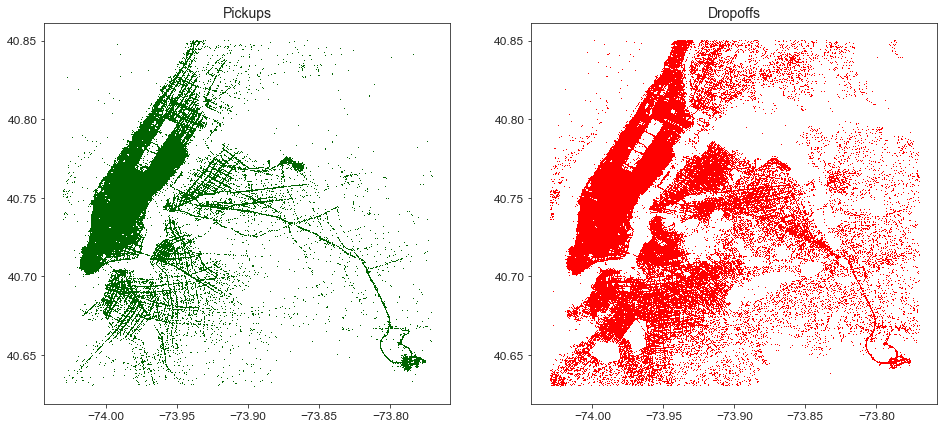

In [35]:
pickup_longitude = list(train.pickup_longitude)
pickup_latitude = list(train.pickup_latitude)

dropoff_longitude = list(train.dropoff_longitude)
dropoff_latitude = list(train.dropoff_latitude)

plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(pickup_longitude, pickup_latitude, ',', color = 'darkgreen', markersize = 0.02)
plt.title("Pickups", fontsize = 14)

plt.subplot(122)
plt.plot(dropoff_longitude, dropoff_latitude, ',', color = 'red', markersize = 0.02)
plt.title("Dropoffs", fontsize = 14)

plt.savefig('pickups_dropoffs.png')

plt.show()

Knowing that the two graphs represent an equal number of points; at a first sight, we  **might guess** that, while the pickups are more concentrated in the area of Manhathan, the dropoff are more spread out the area of Long Island, too.

In [31]:
pick_loc_df = pd.DataFrame()
pick_loc_df['pickup_longitude'] = pickup_longitude
pick_loc_df['pickup_latitude'] = pickup_latitude

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


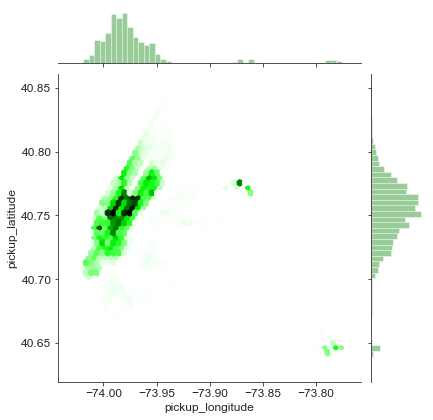

In [32]:
sns.jointplot(x="pickup_longitude", y="pickup_latitude", data = pick_loc_df, kind='hex', color='g')
plt.savefig('pickup_jointplot.png')

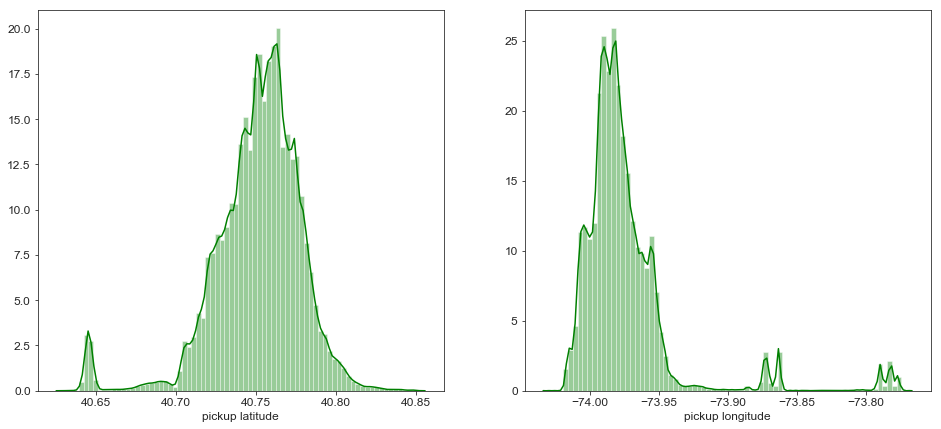

In [33]:
plt.figure(figsize = (16,7))

plt.subplot(121)
sns.distplot(train['pickup_latitude'], axlabel = 'pickup latitude', bins = 75, color="g")

plt.subplot(122)
sns.distplot(train['pickup_longitude'], axlabel = 'pickup longitude', bins = 75, color="g")

plt.savefig('pickup_distribution.png')

plt.show()

In [34]:
drop_loc_df = pd.DataFrame()
drop_loc_df['dropoff_longitude'] = dropoff_longitude
drop_loc_df['dropoff_latitude'] = dropoff_latitude

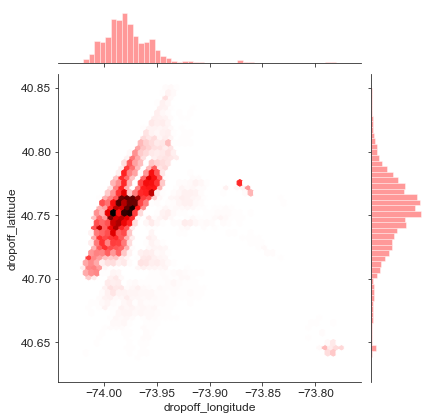

In [36]:
sns.jointplot(x="dropoff_longitude", y="dropoff_latitude", data = drop_loc_df, kind='hex', color='r')
plt.savefig('dropoffs_jointplot.png')

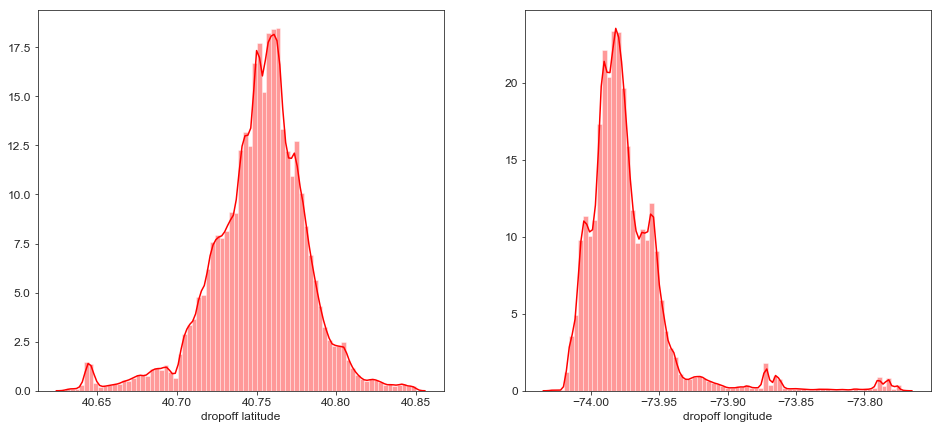

In [37]:
plt.figure(figsize = (16,7))

plt.subplot(121)
sns.distplot(train['dropoff_latitude'], axlabel = 'dropoff latitude', bins = 75, color="r")

plt.subplot(122)
sns.distplot(train['dropoff_longitude'], axlabel = 'dropoff longitude', bins = 75, color="r")

plt.savefig('dropoffs_distributions.png')


plt.show()

## ---------------------------------------------------------

In [31]:
pick_loc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pickup_longitude,1438626.0,-73.973852,0.037089,-74.029953,-73.991882,-73.981773,-73.967529,-73.770927
pickup_latitude,1438626.0,40.751051,0.027437,40.630001,40.737488,40.754120,40.768322,40.849998


In [32]:
drop_loc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dropoff_longitude,1438626.0,-73.973644,0.032375,-74.029999,-73.991295,-73.979874,-73.963524,-73.770004
dropoff_latitude,1438626.0,40.751665,0.029656,40.630001,40.736282,40.754520,40.769527,40.849998


So the difference between the pickup and dropoff distributions is a very smallness.

### Let's now look at the distribution of trip durations

In [33]:
train.trip_duration.describe()

count    1.438626e+06
mean     9.459923e+02
std      5.252159e+03
min      1.000000e+00
25%      3.940000e+02
50%      6.560000e+02
75%      1.059000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

Time taken by above cell is 0.272


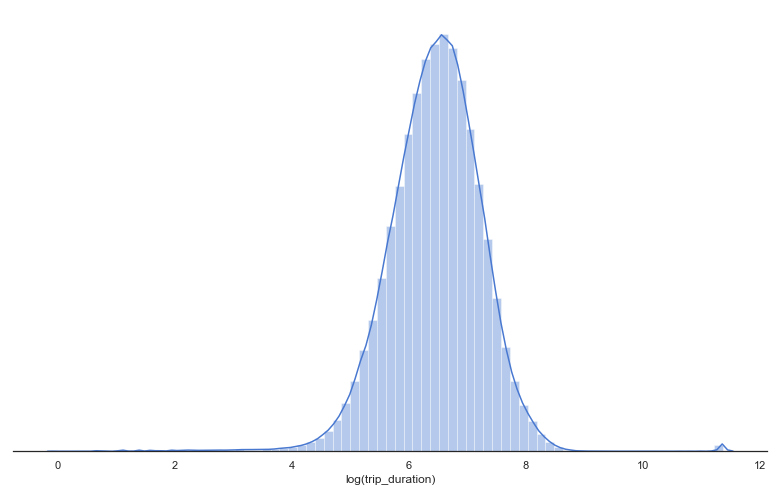

In [38]:
start = time.time()

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(11, 7), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train['trip_duration']), axlabel = 'log(trip_duration)', bins = 75, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()

end = time.time()
print("Time taken by above cell is {}".format(round(end-start,4)))

plt.savefig('time_distribution.png')



plt.show()


Plotting the natural logarithm of **trip_duration** we can infer that the most of the rides have a duration between around 1 minute (_eˆ4 seconds_) and 50 minutes (_eˆ8 seconds_).

## Predict trip duration

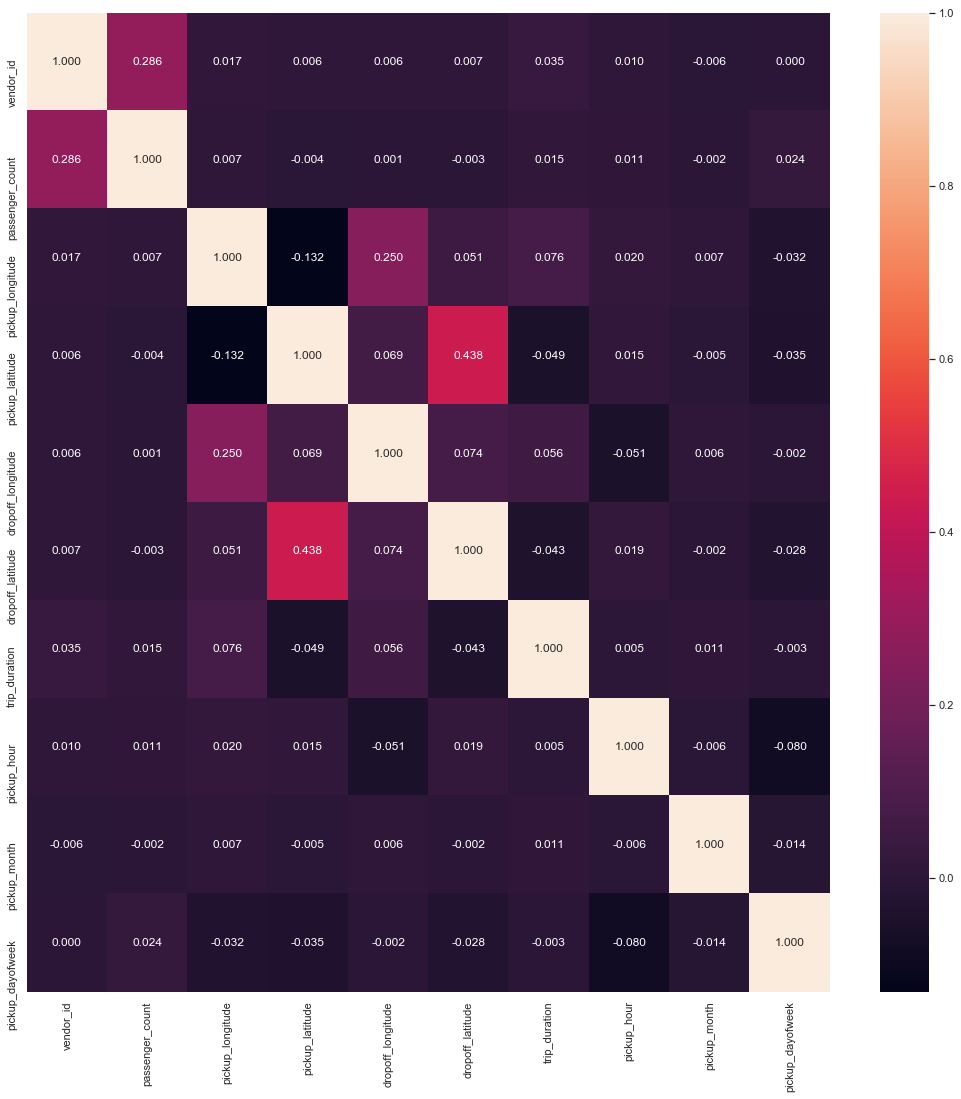

In [39]:
plt.subplots(figsize=(18,18))
sns.heatmap(train.corr(), annot=True, fmt='.3f',color='green')

plt.savefig('correlation_heatmap.png')

plt.show()

# Machine Learning

### Support Vector Regression

In [36]:
from sklearn.svm import SVR
clf = SVR()

In [57]:
train = train.sample(frac = 0.3)

In [58]:
y = train['trip_duration']

In [59]:
X = train[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
           'pickup_hour', 'pickup_month', 'pickup_dayofweek']]

In [60]:
start = time.time()


clf.fit(X, y)


end = time.time()
print("This cell took {} minutes.".format(round((end-start)/60,2)))

This cell took 224.18 minutes.


With just the 30% of the original size of the datasets, this model took us almost 4 hours to come up with a very poor regressor (classificator), Rˆ2 = 4.85%.
This is due to the very low correlation of the feature **trip_duration** with any of the other features.

In [62]:
clf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Random Forest Regression

In [3]:
train = pd.read_csv("./train.csv", sep = ',')

In [4]:
train = train.sample(frac = 0.3)

In [5]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [6]:
start = time.time()

train['pickup_hour'] = train['pickup_datetime'].apply(lambda x: x.hour)
train['pickup_month'] = train['pickup_datetime'].apply(lambda x: x.month)
train['pickup_dayofweek'] = train['pickup_datetime'].apply(lambda x: x.weekday())
train['pickup_dayofweek_name'] = train['pickup_datetime'].apply(lambda x: x.day_name())

end = time.time()

print("This cell took {} seconds".format(round(end-start,2)))

This cell took 8.93 seconds


In [7]:
y = train['trip_duration']

In [8]:
X = train[['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
           'pickup_hour', 'pickup_month', 'pickup_dayofweek']]

In [9]:
from sklearn.ensemble import RandomForestRegressor
rgs = RandomForestRegressor(max_depth = 10, random_state = 0, n_estimators = 200)

rgs

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
start = time.time()

rgs.fit(X,y)

end = time.time()

print("This cell took {} seconds".format(round(end-start,2)))

This cell took 287.84 seconds


In [16]:
print("The Rˆ2 of this model is {} %".format(round(rgs.score(X,y),3)*100))

The Rˆ2 of this model is 14.799999999999999 %


_Which is still very low._

## References
-  https://github.com/sajal2692/data-science-portfolio/blob/master/911%20Calls%20-%20Exploratory%20Analysis.ipynb
-  https://www.kaggle.com/drgilermo/dynamics-of-new-york-city-animation
-  https://www.kaggle.com/c/nyc-taxi-trip-duration/data